In [10]:
import pandas as pd
import numpy as np
#sklearn.preprocessing 의 scale:스케일 조정 패키지
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
from sklearn.model_selection import train_test_split

for f in fm.fontManager.ttflist:
    if 'NanumBarunGothic' in f.fname:
        plt.rcParams['font.family'] = 'NanumBarunGothic' # 폰트를 나눔고딕으로
print(plt.rcParams['font.family'])
matplotlib.rcParams['axes.unicode_minus'] = False #'-'기호 제대로 나오게함

['NanumBarunGothic']


In [3]:
df_custom = pd.read_csv("../data/callcustom.csv",encoding = "euc-kr")
df_custom.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [4]:
# 목표변수 CHURN의 active, churned를 binary mapping 방법 3가지
# 1.
# 2. 더미
# 3. map, lambda
df_custom.CHURN = df_custom.CHURN.map(lambda x:1 if x =="Active" else 0)
df_custom

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,1,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,1,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,1,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,1,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,1,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0
5,1,K105530,M,51,CAT 100,S80,Med,49.43,3,289,486.6,1,31.8,427,903.3
6,1,K106210,F,30,CAT 100,ASAD170,Med,32.30,6,427,729.6,12,52.8,490,907.2
7,1,K106350,M,36,CAT 100,ASAD170,Med,54.87,2,522,801.6,0,0.0,558,884.7
8,1,K106570,F,43,CAT 100,S50,Med,11.23,0,156,516.6,8,84.0,362,987.6
9,1,K107570,F,50,CAT 100,ASAD170,Med,49.97,0,136,466.2,13,31.8,186,632.7


In [7]:
df_custom.drop("CUSTOMER_ID",axis=1,inplace = True)
df_custom

,CHURN,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,1,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,1,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,1,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,1,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,1,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0
5,1,M,51,CAT 100,S80,Med,49.43,3,289,486.6,1,31.8,427,903.3
6,1,F,30,CAT 100,ASAD170,Med,32.30,6,427,729.6,12,52.8,490,907.2
7,1,M,36,CAT 100,ASAD170,Med,54.87,2,522,801.6,0,0.0,558,884.7
8,1,F,43,CAT 100,S50,Med,11.23,0,156,516.6,8,84.0,362,987.6
9,1,F,50,CAT 100,ASAD170,Med,49.97,0,136,466.2,13,31.8,186,632.7


In [8]:
df_custom_y = df_custom["CHURN"]
df_custom_x = pd.get_dummies(df_custom)
df_custom_x.drop("CHURN",axis= 1,inplace = True)

In [11]:
x= df_custom_x
y= df_custom_y
x_tr,x_test,y_tr,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1234)

print("train data x size : {}".format(x_tr.shape))
print("train data y size : {}".format(y_tr.shape))
print("test data x size : {}".format(x_test.shape))
print("test data y size : {}".format(y_test.shape))

train data x size : (651, 33)
train data y size : (651,)
test data x size : (279, 33)
test data y size : (279,)


In [12]:
rf_uncustomized = RandomForestClassifier(random_state = 1234)
rf_uncustomized.fit(x_tr,y_tr)

print("Accurcy on train set :{:.3f}".format(rf_uncustomized.score(x_tr,y_tr)))
print("Accurcy on test set :{:.3f}".format(rf_uncustomized.score(x_test,y_test)))


Accurcy on train set :0.997
Accurcy on test set :0.860


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [13]:
rf_uncustomized

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False)

In [14]:
x_tr_scaled = scale(x_tr,axis = 0)
x_test_scaled = scale(x_test,axis = 0)
pd.DataFrame(x_tr_scaled,columns=x_tr.columns).head()

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  


,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0.659297,0.121772,-0.191707,1.476872,1.496854,-0.518328,0.678178,1.575792,1.532985,0.915960,...,-0.46075,-0.111542,-0.111542,-0.374306,-0.262613,-0.118401,-1.105370,1.788854,-0.390144,-0.039223
1,0.736049,0.786591,2.396339,-0.661815,-0.534734,-0.075671,-0.284308,-0.569331,-0.143503,0.915960,...,-0.46075,-0.111542,-0.111542,-0.374306,-0.262613,-0.118401,0.904674,-0.559017,-0.390144,-0.039223
2,-0.415244,1.480625,-0.766829,1.432593,1.087469,-1.024223,-1.356793,0.979029,0.475336,0.915960,...,-0.46075,-0.111542,-0.111542,-0.374306,-0.262613,-0.118401,-1.105370,1.788854,-0.390144,-0.039223
3,-0.568749,1.178499,-0.191707,0.117500,-0.452149,-0.644802,-0.944298,-0.287078,-0.953914,0.915960,...,-0.46075,-0.111542,-0.111542,2.671610,-0.262613,-0.118401,0.904674,-0.559017,-0.390144,-0.039223
4,0.045274,1.520528,2.108779,-0.431563,-0.870973,-0.771276,1.745163,-0.750780,-0.956148,-1.091751,...,-0.46075,-0.111542,-0.111542,-0.374306,-0.262613,-0.118401,0.904674,-0.559017,-0.390144,-0.039223


In [15]:
rf_scaled = RandomForestClassifier(random_state = 1234)
rf_scaled.fit(x_tr_scaled,y_tr)

print("train 정확도 : {:.3f}".format(rf_scaled.score(x_tr_scaled,y_tr)))
print("test 정확도 : {:.3f}".format(rf_scaled.score(x_test_scaled,y_test)))


train 정확도 : 0.997
test 정확도 : 0.860


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [16]:
# random forest
n_iter_tree = 30
train_accuracy = []
test_accuracy = []

for n_tree in range(n_iter_tree):
    rf1 = RandomForestClassifier(n_estimators =n_tree +1, random_state = 1234)
    rf1.fit(x_tr_scaled,y_tr)
    train_accuracy.appenddf_hmeq_test(rf1.score(x_tr_scaled,y_tr))
    test_accuracy.append(rf1.score(x_test_scaled,y_test))

df_accuracy1 = pd.DataFrame()
df_accuracy1["NumberofTree"] = [n_tree + 1 for n_tree in range(n_iter_tree)]
df_accuracy1["TrainAccuracy"] = train_accuracy
df_accuracy1["TestAccuracy"] = test_accuracy
df_accuracy1

,NumberofTree,TrainAccuracy,TestAccuracy
0,1,0.920123,0.817204
1,2,0.906298,0.774194
2,3,0.966206,0.863799
3,4,0.981567,0.870968
4,5,0.990783,0.870968
5,6,0.990783,0.874552
6,7,0.992320,0.874552
7,8,0.995392,0.874552
8,9,0.992320,0.870968
9,10,0.996928,0.860215


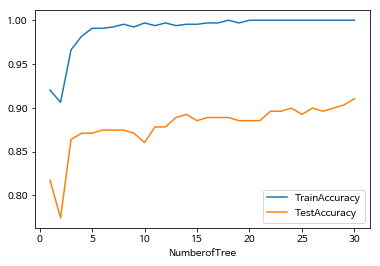

In [17]:
df_accuracy1.set_index("NumberofTree",inplace = False).plot.line()

In [18]:
#트레인 및 테스트 정확도 저장용
train_accuracy = []
test_accuracy = []

para_criterion = ["gini","entropy"]
for criterion in para_criterion:
    rf2 = RandomForestClassifier(criterion = criterion, random_state = 1234)
    rf2.fit(x_tr_scaled,y_tr)
    train_accuracy.append(rf2.score(x_tr_scaled,y_tr))
    test_accuracy.append(rf2.score(x_test_scaled,y_test))

df_accuracy2 = pd.DataFrame()
df_accuracy2["Criterion"] = para_criterion
df_accuracy2["TrainAccuracy"] = train_accuracy
df_accuracy2["TestAccuracy"] = test_accuracy

df_accuracy2

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Criterion,TrainAccuracy,TestAccuracy
0,gini,0.996928,0.860215
1,entropy,0.995392,0.870968


In [21]:

#%
#max_depth : 최대깊이 변경
train_accuracy =[];test_accuracy=[];
# 최대깊이 1~10까지 순차 실행
para_max_depth = [i+1 for i in range(10)]*2
n_iter_depth = 10

para_criterion = ["gini"]*n_iter_depth+["entropy"]*n_iter_depth
# print(para_criterion)
for (criterion,depth) in zip(para_criterion,para_max_depth):
    rf3 = RandomForestClassifier(criterion = criterion, max_depth = depth, random_state = 1234)
    rf3.fit(x_tr_scaled,y_tr)
    train_accuracy.append(rf3.score(x_tr_scaled,y_tr))
    test_accuracy.append(rf3.score(x_test_scaled,y_test))

df_accuracy3 = pd.DataFrame()
df_accuracy3["Criterion"] = para_criterion
df_accuracy3["Depth"] = para_max_depth
df_accuracy3["TrainAccuracy"] = train_accuracy
df_accuracy3["TestAccuracy"] = test_accuracy


['gini', 'gini', 'gini', 'gini', 'gini', 'gini', 'gini', 'gini', 'gini', 'gini', 'entropy', 'entropy', 'entropy', 'entropy', 'entropy', 'entropy', 'entropy', 'entropy', 'entropy', 'entropy']


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/skl

In [20]:
df_accuracy3.round(3)

,Criterion,Depth,TrainAccuracy,TestAccuracy
0,gini,1,0.791,0.842
1,gini,2,0.839,0.860
2,gini,3,0.845,0.860
3,gini,4,0.873,0.846
4,gini,5,0.879,0.871
5,gini,6,0.929,0.878
6,gini,7,0.916,0.871
7,gini,8,0.929,0.871
8,gini,9,0.935,0.867
9,gini,10,0.957,0.857


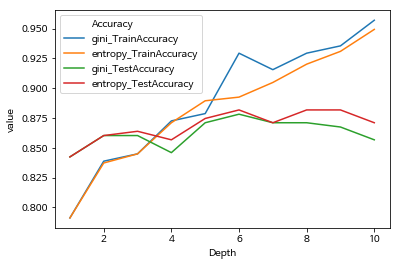

In [22]:
df_accuracy3_melt= pd.melt(df_accuracy3,id_vars=["Criterion","Depth"])
df_accuracy3_melt["Accuracy"] = df_accuracy3_melt["Criterion"]+"_"+df_accuracy3_melt["variable"]
sns.lineplot(x = "Depth", y = "value",hue = "Accuracy", data = df_accuracy3_melt)

In [24]:
# 최소 잎사귀 수 제한
train_accuracy = []
test_accuracy = []

n_depth = 4

n_iter_min_leaf = 10
para_citerion = ["gini"] * n_iter_min_leaf
para_min_leaf = [i+1 for i in range(n_iter_min_leaf)]

for (criterion, leafsize) in zip(para_citerion,para_min_leaf):
    rf4 = RandomForestClassifier(criterion = criterion, max_depth = n_depth , min_samples_leaf= leafsize, random_state = 1234)
    rf4.fit(x_tr_scaled,y_tr)
    train_accuracy.append(rf4.score(x_tr_scaled,y_tr))
    test_accuracy.append(rf4.score(x_test_scaled,y_test))
    
# 데이터 테이블로 저장
df_accuracy4 = pd.DataFrame()
df_accuracy4["Criterion"] = para_citerion
df_accuracy4["Depth"] = n_depth
df_accuracy4["MinLeafSize"]=para_min_leaf
df_accuracy4["TrainAccuracy"] = train_accuracy
df_accuracy4["TestAccuracy"] = test_accuracy

df_accuracy4

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/skl

,Criterion,Depth,MinLeafSize,TrainAccuracy,TestAccuracy
0,gini,4,1,0.872504,0.845878
1,gini,4,2,0.861751,0.874552
2,gini,4,3,0.863287,0.878136
3,gini,4,4,0.870968,0.863799
4,gini,4,5,0.864823,0.878136
5,gini,4,6,0.854071,0.867384
6,gini,4,7,0.843318,0.874552
7,gini,4,8,0.843318,0.863799
8,gini,4,9,0.841782,0.860215
9,gini,4,10,0.841782,0.860215


In [25]:
df_accuracy4.round(3)

,Criterion,Depth,MinLeafSize,TrainAccuracy,TestAccuracy
0,gini,4,1,0.873,0.846
1,gini,4,2,0.862,0.875
2,gini,4,3,0.863,0.878
3,gini,4,4,0.871,0.864
4,gini,4,5,0.865,0.878
5,gini,4,6,0.854,0.867
6,gini,4,7,0.843,0.875
7,gini,4,8,0.843,0.864
8,gini,4,9,0.842,0.860
9,gini,4,10,0.842,0.860


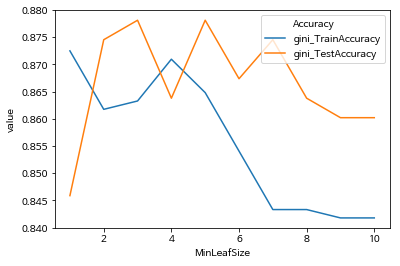

In [26]:
df_accuracy4_melt = pd.melt(df_accuracy4,id_vars = ["Criterion","Depth","MinLeafSize"])
df_accuracy4_melt["Accuracy"] = df_accuracy4_melt["Criterion"]+"_"+ df_accuracy4_melt["variable"]
sns.lineplot(x = "MinLeafSize", y= "value", hue = "Accuracy", data = df_accuracy4_melt)

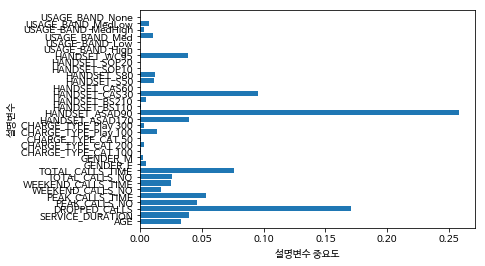

In [28]:
rf_model = RandomForestClassifier(criterion = "gini", max_depth = 4, min_samples_leaf = 10, n_estimators= 100, random_state= 1234)
rf_model.fit(x_tr_scaled,y_tr)

df_feature_importance = pd.DataFrame()
df_feature_importance["feature"] = x_tr.columns
df_feature_importance["importance"] = rf_model.feature_importances_
df_feature_importance.sort_values(by = "importance",ascending = False)

def plot_feature_importances(model):
    n_features = x_tr.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align = "center")
    plt.yticks(np.arange(n_features),x_tr.columns)
    plt.xlabel("설명변수 중요도")
    plt.ylabel("설명변수")
    plt.ylim(-1,n_features)
    
plot_feature_importances(rf_model)
    

In [29]:
df_feature_importance

,feature,importance
0,AGE,0.032903
1,SERVICE_DURATION,0.039769
2,DROPPED_CALLS,0.170918
3,PEAK_CALLS_NO,0.046065
4,PEAK_CALLS_TIME,0.053201
5,WEEKEND_CALLS_NO,0.016683
6,WEEKEND_CALLS_TIME,0.024848
7,TOTAL_CALLS_NO,0.025935
8,TOTAL_CALLS_TIME,0.076279
9,GENDER_F,0.005260
